<a href="https://colab.research.google.com/github/priaJuli/IR_Pilkada2017/blob/main/SGDClassifier_emoticon_test_pilkada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import numpy as np
import pandas as pd

pd.options.display.max_colwidth = 300

In [2]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# nltk
# from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer 
   
ps = PorterStemmer() 

In [4]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

In [5]:
url = 'https://raw.githubusercontent.com/priaJuli/IR_research/main/dataset_tweet_sentiment_pilkada_DKI_2017.csv'

url_emoticon = 'https://raw.githubusercontent.com/FLAIST/emosent-py/master/emosent/data/Emoji_Sentiment_Data_v1.0.csv'

# Importing the dataset
DATASET_COLUMNS=['Id','target','Pasangan Calon','text']
# ['target','ids','date','flag','user','text']
emoticon_columns = ['Emoji','Unicode' 'codepoint','Unicode name']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(url, names=DATASET_COLUMNS, skiprows=[0])

df_emo = pd.read_csv(url_emoticon)

df["target"] = (df['target'] == "positive").astype(int)

print(df.head())

df_emo['Unicode name'] = df_emo['Unicode name'].str.lower()

dictionary_emoticons = df_emo['Unicode name'].values

dict_emoticons_replace = df_emo['Emoji'].values

# print(df_emo['Unicode name'].head())

# print(df_emo['Emoji'])

print(dictionary_emoticons[0:5])

print(dict_emoticons_replace[0:5])

   Id  ...                                                                                                                                     text
0   1  ...  Banyak akun kloning seolah2 pendukung #agussilvy mulai menyerang paslon #aniessandi dengan opini dan argumen pmbenaran..jangan terkecoh
1   2  ...                                                                         #agussilvy bicara apa kasihan yaa...lap itu air matanya wkwkwkwk
2   3  ...             Kalau aku sih gak nunggu hasil akhir QC tp lagi nunggu motif cuitan pak @SBYudhoyono kayak apa.. pasca #AgusSilvy Nyungsep..
3   4  ...           Kasian oh kasian dengan peluru 1milyar untuk tiap RW #agussilvy tidak mempan menangin pilkada #QuickCount #PilkadaSerentak2017
4   5  ...                                              Maaf ya pendukung #AgusSilvy..hayo dukung #AniesSandi diputaran 2 @ronavioleta @NetizenTofa

[5 rows x 4 columns]
['face with tears of joy' 'heavy black heart' 'black heart suit'
 'smiling face with heart

In [6]:

df.sample(5)


,Id,target,Pasangan Calon,text
740,741,0,Anies-Sandi,Boss.. bisa cabut pasang kaya kebijakan reklamasi! #OKEOCE
766,767,1,Anies-Sandi,Selamat untuk Pasangan No. 3 Anies- Sandi. #pilkadadki2017 @ Duren Tiga Selatan https://www.instagram.com/p/BTD7zIdFCwC/
169,170,1,Agus-Sylvi,"soal mental kalah Pilkada, Indonesia harus berguru pada sosok AHY."
691,692,0,Anies-Sandi,#aniessandi #bhinekatunggalika #isusara Kubu Anies-Sandi Serukan Stop Politisasi Kebhinekaan http://dlvr.it/NtcTLN
274,275,1,Agus-Sylvi,#Djarot Apresiasi #AHY Relakan Relawannya Dukung #Ahok <Clapping Hands> <Clapping Hands> http://merahputih.com #merahputih #Indonesia #Jakarta #PilgubDKI #2017


In [7]:
df.columns

Index(['Id', 'target', 'Pasangan Calon', 'text'], dtype='object')

In [8]:
print('length of data is', len(df))

length of data is 900


In [9]:
df.shape

(900, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              900 non-null    int64 
 1   target          900 non-null    int64 
 2   Pasangan Calon  900 non-null    object
 3   text            900 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.2+ KB


In [11]:
df.dtypes

Id                 int64
target             int64
Pasangan Calon    object
text              object
dtype: object

In [12]:
df.isnull().sum()

Id                0
target            0
Pasangan Calon    0
text              0
dtype: int64

In [13]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:     ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:      900


In [14]:
df['target'].unique()

array([0, 1])

In [15]:
df['target'].nunique()

2

         Id  Pasangan Calon  text
target                           
0       450             450   450
1       450             450   450


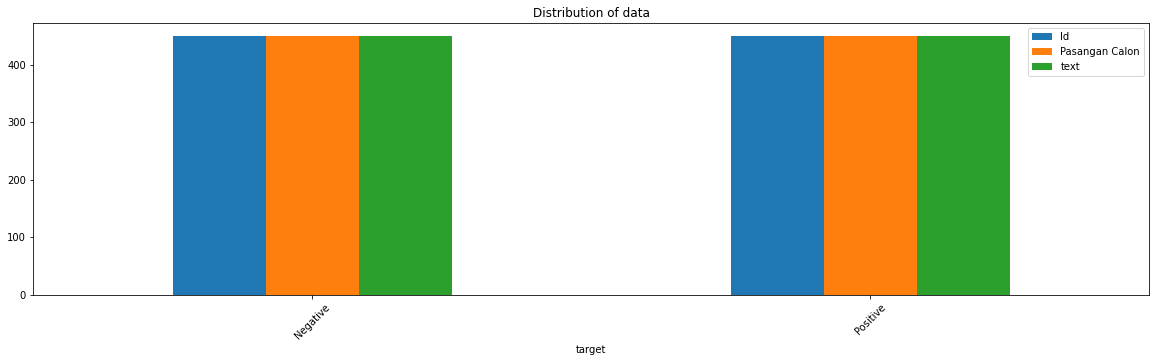

In [16]:
# Plotting the distribution for dataset.
print(df.groupby('target').count())
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=True,figsize=(20, 5))
ax.set_xticklabels(['Negative','Positive'], rotation=45)
# for p in ax.patches:
    # ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

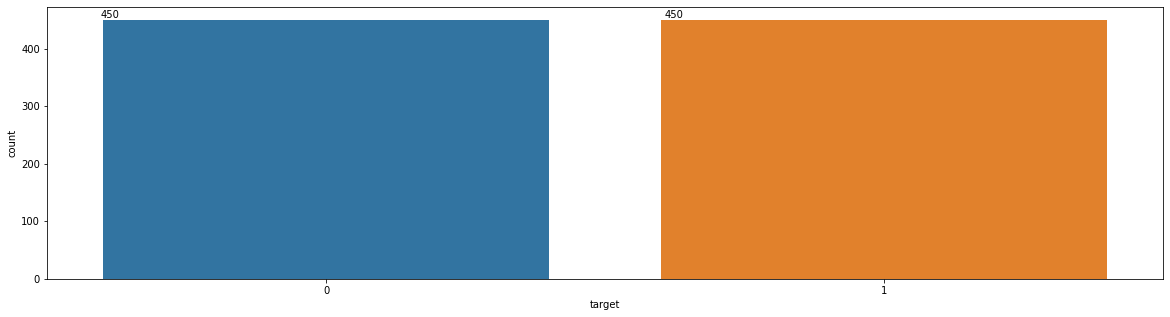

In [17]:
import seaborn as sns
plt.figure(figsize = (20,5))
ax=sns.countplot(x='target', data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

In [18]:
data=df[['text','target']]
data.head()

,text,target
0,Banyak akun kloning seolah2 pendukung #agussilvy mulai menyerang paslon #aniessandi dengan opini dan argumen pmbenaran..jangan terkecoh,0
1,#agussilvy bicara apa kasihan yaa...lap itu air matanya wkwkwkwk,0
2,Kalau aku sih gak nunggu hasil akhir QC tp lagi nunggu motif cuitan pak @SBYudhoyono kayak apa.. pasca #AgusSilvy Nyungsep..,0
3,Kasian oh kasian dengan peluru 1milyar untuk tiap RW #agussilvy tidak mempan menangin pilkada #QuickCount #PilkadaSerentak2017,0
4,Maaf ya pendukung #AgusSilvy..hayo dukung #AniesSandi diputaran 2 @ronavioleta @NetizenTofa,0


In [19]:
data['target'] = data['target'].replace(4,1)
data['target'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    450
0    450
Name: target, dtype: int64

In [20]:
data['target'].unique()

array([0, 1])

In [21]:
data_pos = data[data['target'] == 1]
data_pos.head()
print(len(data_pos))

450


In [22]:
data_neg = data[data['target'] == 0]
data_neg.head()
print(len(data_neg))

450


In [23]:
data_pos = data_pos.iloc[:]
data_neg = data_neg.iloc[:]
print(type(data_pos))
print(type(data_neg))
dataset = pd.concat([data_pos, data_neg])
dataset
dataset.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,text,target
150,Doa ku.. Semoga suaranya mas Agus-Sylvi beneran ke #Badja #PilkadaDKI2017 yakin kan mas Agus.. Aku pada mu..,1
151,"Terima kasih mas @AgusYudhoyono, karenamu anak muda telah berani menyuarakan perubahan. Kami tetap bersamamu #YNWA",1
152,KETEMU DI ISTIQLAL Bangga Pernah Jadi Bagian Dari @AgusYudhoyono dan @sylviana_murni @ZaraZettiraZr @AhyCenter @SohibAHY,1
153,"Tersingkir dari kancah pilkada DKI, rupanya ada cara lain untuk mengangkat seseorang #AHY Mendunia",1
154,"Dalam Pilkada DKI, AHY juga mampu menunjukkan kualitasnya sebagai seorang pemimpin muda yang berjiwa ksatria. (AHY mendunia)",1


In [24]:
dataset['text']=dataset['text'].str.lower()
print(dataset['text'][13])
print(dataset['text'][210])
print(dataset['text'][305])
print(dataset['text'][373])
print(dataset['text'][552])

dataset['text'].sample(5)

aku juga kemarin #ahy 19april2017 suaraku utk paslon 3 #dki
salam untuk kaum muda. hormat pada yang tua. #ahy
ahok menang tipis di tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd  #seruji #fokus #pilkadadki2017
hati hati komentar tentang #ahokdjarot #kalahpilkada, ujung2nya anda dituduh nyinyir
#duajari #ahokdjarot #badja #salamduajari #duajari #kode #code #gangster #farmer #foodhero https://www.instagram.com/p/bs1x10_bovd/


16                                                                   kalau pencatutan nama #ahy dan mpo #silvi melanggar hukum ga ya.. wkwkwkwkkwkk
635    jangan kotori lagi balai kota dengan karangan bunga http://obsessionnews.com @habiburokhman #ahokdjarot #ahok #anies #aniessandi #mayday2017
111         ahy sangat cemas terhadap situasi sosial usai pilkada jakarta: pilkada dki jakarta berdampak negatif bukan hanyaâ€¦ http://dlvr.it/pgqy
641                                   bikin macet, warga kelapa gading harap proyek tidak mangkrak https://goo.gl/nlm8xl  #aniessandi #kelapagading
756                                         mari lebih bekerja keras dan semoga dapat mengemban amanah. #aniessandi #amanatnasional #pilkadadki2017
Name: text, dtype: object

In [25]:
!pip install Sastrawi

In [26]:
# print(dataset['text'][305])
# print(dataset['text'][564])

# a_string = "this is a <ki_te2> <ki_te1> message"
# result = re.findall(r"\<([A-Za-z0-9_]+)\>", a_string)
# print("".join(result))

# print(dictionary_emoticons[0:5])
# print(dict_emoticons_replace[0:5])

for idx in range(len(dictionary_emoticons)):
  dict_emoji = "<{}>".format(dictionary_emoticons[idx])
  dictionary_emoticons[idx] = dict_emoji
  # print(dict_emoji)
  emoji_replace = dict_emoticons_replace[idx]
  dataset['text'] = dataset['text'].replace(dict_emoji, emoji_replace, regex=True)

# dataset['text'] = dataset['text'].replace("<face without mouth>", "LOL", regex=True)
print(dataset['text'][305])
print(dataset['text'][564])
print(dataset['text'][725])

ahok menang tipis di tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd  #seruji #fokus #pilkadadki2017
saya percaya, kondisi cuaca beberapa hari sebelum pilkada dki ikut serta memberikan kontribusi positif ke ahok-djarot. aku 2!! ✌ ✌
dan nginulpun terdiam 😶 . #dacademy4 salam #okeoce, #coblospecinya


In [27]:
def get_emoticon(text):
    values = " ".join([word for word in str(text).split() if word in dict_emoticons_replace])
    values = " "+values
    return values

dataset['only_emoji'] = dataset['text'].apply(lambda text: get_emoticon(text))
print(dataset['only_emoji'][725])
print(dataset['text'][305])
print(dataset['text'][564])
print(dataset['text'][725])

 😶
ahok menang tipis di tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd  #seruji #fokus #pilkadadki2017
saya percaya, kondisi cuaca beberapa hari sebelum pilkada dki ikut serta memberikan kontribusi positif ke ahok-djarot. aku 2!! ✌ ✌
dan nginulpun terdiam 😶 . #dacademy4 salam #okeoce, #coblospecinya


In [28]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.tokenize import word_tokenize 
 

stop_factory = StopWordRemoverFactory().get_stop_words()
print(stop_factory)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [29]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_factory])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].sample(5)

ahok menang tipis tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd #seruji #fokus #pilkadadki2017
#duajari #ahokdjarot #badja #salamduajari #duajari #kode #code #gangster #farmer #foodhero https://www.instagram.com/p/bs1x10_bovd/


41                                               cari teman kok cara gitu ya.. pdhal #ahy sdh jelas. gubernur baru...@mastbp
423    kuota @aagym habis makanya mengikuti berita @warta_mui @mata #indonesia #pilkadadki #aniessandi #voteahok #ahokdjarot
395                                                       simpatik aja segini, ga simpatik seberapa yak #ahok4ri #ahokdjarot
299                                       bukan #ahy sdh menunjukkan jiwa besar hasil pilkada sulit, sungguh sulit deklarasi
738         ko beberapa polling, kini goreng soal kpud netral, kamvreetttt.... #pilkadadki2017 #debatfinalpilkadadki #okeoce
Name: text, dtype: object

In [30]:
def cleaning_URLs(data):
    return re.sub('http[s]?://\S+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].head()



ahok menang tipis tps tempat habib rizieq mencoblos  #seruji #fokus #pilkadadki2017
#duajari #ahokdjarot #badja #salamduajari #duajari #kode #code #gangster #farmer #foodhero 


150            doa ku.. semoga suaranya mas agus-sylvi beneran #badja #pilkadadki2017 yakin kan mas agus.. aku mu..
151         terima kasih mas @agusyudhoyono, karenamu anak muda berani menyuarakan perubahan. tetap bersamamu #ynwa
152    ketemu istiqlal bangga pernah jadi bagian @agusyudhoyono @sylviana_murni @zarazettirazr @ahycenter @sohibahy
153                                  tersingkir kancah pilkada dki, rupanya cara mengangkat seseorang #ahy mendunia
154            pilkada dki, ahy mampu menunjukkan kualitasnya seorang pemimpin muda berjiwa ksatria. (ahy mendunia)
Name: text, dtype: object

In [31]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].sample(5)


ahok menang tipis tps tempat habib rizieq mencoblos  seruji fokus pilkadadki2017
duajari ahokdjarot badja salamduajari duajari kode code gangster farmer foodhero 


4                                        maaf pendukung agussilvyhayo dukung aniessandi diputaran 2 ronavioleta netizentofa
625                 ko beberapa polling kini goreng soal kpud netral kamvreetttt pilkadadki2017 debatfinalpilkadadki okeoce
249    salam wallahulmuwafiq ilaaqwamithoriq sandiuno mencerminkan beliau nu sejak jatuh hati meski waktu ahy agusyudhoyono
255                                     waktu  ah sudahlah frowning face didienazhar ahy no 1 thumbs up thumbs up thumbs up
160          agusyudhoyono semangat terus pak ahy faktor kekalahan pilkada waktu kemarin wakil pak ahy maju lagi insyaalloh
Name: text, dtype: object

In [32]:

def cleaning_repeating_char(text):
    return ' '.join(dict.fromkeys(text.split()))
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
print(dataset['text'][305])
print(dataset['text'][552])


ahok menang tipis tps tempat habib rizieq mencoblos seruji fokus pilkadadki2017
duajari ahokdjarot badja salamduajari kode code gangster farmer foodhero


In [33]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
print(dataset['text'][13])
print(dataset['text'][210])
print(dataset['text'][305])
print(dataset['text'][373])
print(dataset['text'][725])
dataset['text'].head()

aku kemarin ahy april suaraku utk paslon  dki
salam kaum muda hormat tua ahy
ahok menang tipis tps tempat habib rizieq mencoblos seruji fokus pilkadadki
hati komentar ahokdjarot kalahpilkada ujungnya dituduh nyinyir
nginulpun terdiam 😶 dacademy salam okeoce coblospecinya


150                       doa ku semoga suaranya mas agussylvi beneran badja pilkadadki yakin kan agus aku mu
151       terima kasih mas agusyudhoyono karenamu anak muda berani menyuarakan perubahan tetap bersamamu ynwa
152    ketemu istiqlal bangga pernah jadi bagian agusyudhoyono sylvianamurni zarazettirazr ahycenter sohibahy
153                              tersingkir kancah pilkada dki rupanya cara mengangkat seseorang ahy mendunia
154              pilkada dki ahy mampu menunjukkan kualitasnya seorang pemimpin muda berjiwa ksatria mendunia
Name: text, dtype: object

In [34]:
import nltk
st = nltk.PorterStemmer()

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
st = factory.create_stemmer()

def stemming_on_text(data):
    return st.stem(data)
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))

print(dataset['text'][13])
print(dataset['text'][210])
print(dataset['text'][305])
print(dataset['text'][373])
print(dataset['text'][552])

dataset['text'].head()



aku kemarin ahy april suara utk paslon dki
salam kaum muda hormat tua ahy
ahok menang tipis tps tempat habib rizieq coblos ruji fokus pilkadadki
hati komentar ahokdjarot kalahpilkada ujung tuduh nyinyir
duajari ahokdjarot badja salamduajari kode code gangster farmer foodhero


150                          doa ku moga suara mas agussylvi beneran badja pilkadadki yakin kan agus aku mu
151                       terima kasih mas agusyudhoyono karena anak muda berani suara ubah tetap sama ynwa
152    ketemu istiqlal bangga pernah jadi bagi agusyudhoyono sylvianamurni zarazettirazr ahycenter sohibahy
153                                             singkir kancah pilkada dki rupa cara angkat orang ahy dunia
154                              pilkada dki ahy mampu tunjuk kualitas orang pimpin muda jiwa ksatria dunia
Name: text, dtype: object

In [35]:
# import nltk

# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer 

# # Init the Wordnet Lemmatizer
# lm = WordNetLemmatizer()

# def lemmatizer_on_text(data):
#     text = [lm.lemmatize(word) for word in data]
#     return data
# dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))

# print(dataset['text'][305])
# print(dataset['text'][552])
# print(dataset['text'][564])
# print(dataset['text'][725])

# dataset['text'].head()

In [36]:
# print(dataset['only_emoji'].head())

# print(dataset['only_emoji'])

dataset['text'] = dataset['text'].str.cat(dataset['only_emoji'], join="left")

print(dataset['text'][711])
print(dataset['text'][120])
print(dataset['text'][712])
print(dataset['text'][373])
print(dataset['text'][725])

jadi kalo kalah badja buat curang picik prabowo sebut aniessandi menang pilkada dki curang 😬
ahy anieshilangya ahokdjarotdirosi kompastv rosiannahi sittayohag gunawanahokers gunjkt partaisocmed ulinyusron 😬 😬
waktu kampanye sandi malah cianjur anies minta dukung aher hhmm jabar siap landa aniessandi zippermouth face kalah pilkada 
hati komentar ahokdjarot kalahpilkada ujung tuduh nyinyir 
nginulpun diam dacademy salam okeoce coblospecinya 😶


In [37]:


X=dataset.text
X.sample(5)
y=dataset.target
y.sample(5)

286    1
297    1
749    0
813    1
523    1
Name: target, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((810,), (90,), (810,), (90,))

In [39]:
print(X[725])
# vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=50000)
# vectoriser.fit(X)
# print('No. of feature_words: ', len(vectoriser.get_feature_names()))
vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=50000, token_pattern=r'[^\s]+')
vectoriser.fit(X)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
print(vectoriser.get_feature_names())

nginulpun diam dacademy salam okeoce coblospecinya 😶
No. of feature_words:  2857
['a', 'aa', 'aagym', 'aamiin', 'abaaah', 'abal', 'abang', 'abdi', 'abis', 'absurd', 'abunawas', 'aburizal', 'abused', 'acara', 'acu', 'ada', 'adaaqua', 'addiems', 'adekku', 'adil', 'adjierimbawan', 'adjrot', 'agam', 'agama', 'agamaras', 'agus', 'agusharimurtiyudhoyono', 'agussilvy', 'agussilvyhayo', 'agussylvi', 'agusyudhoyono', 'ah', 'aher', 'ahhhh', 'ahli', 'ahmadfuadanwar', 'ahok', 'ahokbali', 'ahokbtp', 'ahokdicintairakyat', 'ahokdjarot', 'ahokdjarotdirosi', 'ahokdjarotlebihbaik', 'ahokdjarotmenang', 'ahoker', 'ahokers', 'ahokforbali', 'ahokfornobel', 'ahokfree', 'ahokhebat', 'ahokishope', 'ahokjarot', 'ahokkalah', 'ahokkeok', 'ahoklovers', 'ahokmandikembang', 'ahokmartir', 'ahokmenang', 'ahokpanikahokkalah', 'ahokpenistaagama', 'ahokpresidenrike', 'ahokrekormuri', 'ahokri', 'ahokselaludihati', 'ahokshow', 'ahoktakbersalah', 'ahoktumbang', 'ahox', 'ahy', 'ahyall', 'ahyangarukkepala', 'ahycenter', 'ahyc

In [40]:
X_train = vectoriser.transform(X_train)
X_train

<810x2857 sparse matrix of type '<class 'numpy.float64'>'
	with 8593 stored elements in Compressed Sparse Row format>

In [41]:
X_test  = vectoriser.transform(X_test)
X_test



scorvar = ["accuracy", "precision", "recall", "f1"]
# X_train = vectoriser.transform(X)
# X_train
# y_train = y

In [42]:
def model_Evaluate(model,X_test,y_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    # print(cf_matrix)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.4%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    # print(group_percentages)
    labels = [f'{v1} : {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        42
           1       0.77      0.77      0.77        48

    accuracy                           0.76        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.76      0.76      0.76        90

Accuracy 0.7555555555555555


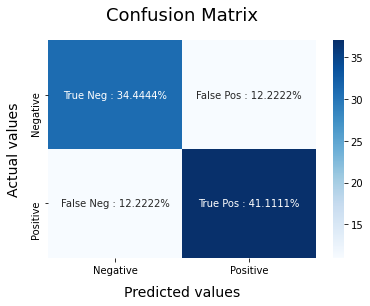

In [43]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
sgd.fit(X_train, y_train)
model_Evaluate(sgd,X_test,y_test)
y_pred1 = sgd.predict(X_test)

cf_matrix10 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix10))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        86
           1       0.78      0.77      0.77        94

    accuracy                           0.77       180
   macro avg       0.77      0.77      0.77       180
weighted avg       0.77      0.77      0.77       180

Accuracy 0.7666666666666667


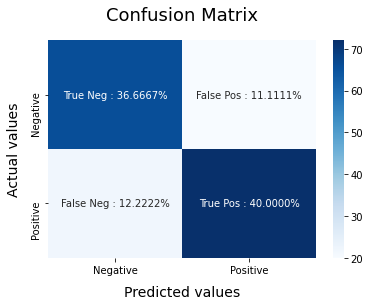

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = vectoriser.transform(X_train)
X_train

X_test  = vectoriser.transform(X_test)
X_test

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
sgd.fit(X_train, y_train)
model_Evaluate(sgd,X_test,y_test)
y_pred1 = sgd.predict(X_test)

cf_matrix20 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix20))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       129
           1       0.74      0.78      0.76       141

    accuracy                           0.74       270
   macro avg       0.74      0.74      0.74       270
weighted avg       0.74      0.74      0.74       270

Accuracy 0.7444444444444445


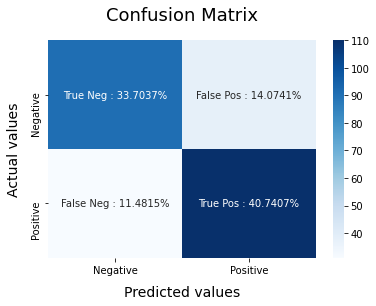

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = vectoriser.transform(X_train)
X_train

X_test  = vectoriser.transform(X_test)
X_test

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
sgd.fit(X_train, y_train)
model_Evaluate(sgd,X_test,y_test)
y_pred1 = sgd.predict(X_test)

cf_matrix30 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix30))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       169
           1       0.73      0.72      0.72       191

    accuracy                           0.71       360
   macro avg       0.71      0.71      0.71       360
weighted avg       0.71      0.71      0.71       360

Accuracy 0.7111111111111111


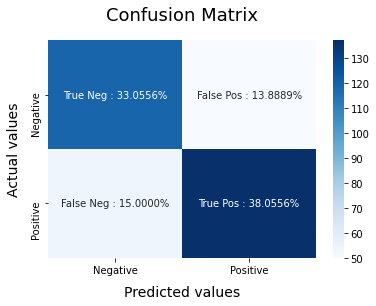

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = vectoriser.transform(X_train)
X_train

X_test  = vectoriser.transform(X_test)
X_test

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
sgd.fit(X_train, y_train)
model_Evaluate(sgd,X_test,y_test)
y_pred1 = sgd.predict(X_test)

cf_matrix40 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix40))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       213
           1       0.71      0.70      0.71       237

    accuracy                           0.69       450
   macro avg       0.69      0.69      0.69       450
weighted avg       0.69      0.69      0.69       450

Accuracy 0.6933333333333334


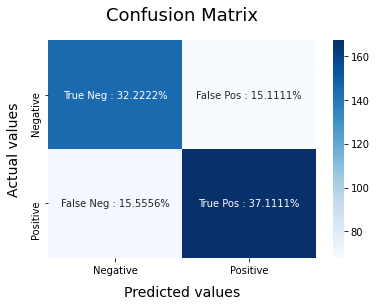

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = vectoriser.transform(X_train)
X_train

X_test  = vectoriser.transform(X_test)
X_test

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
sgd.fit(X_train, y_train)
model_Evaluate(sgd,X_test,y_test)
y_pred1 = sgd.predict(X_test)

cf_matrix50 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix50))

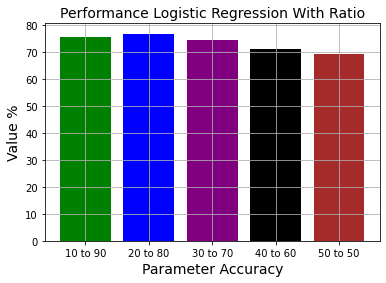

In [48]:
import matplotlib.pyplot as plt
   
params = ['10 to 90','20 to 80','30 to 70', '40 to 60', '50 to 50']
value_performace = [(cf_matrix10*100),(cf_matrix20*100),(cf_matrix30*100),(cf_matrix40*100),(cf_matrix50*100)]

New_Colors = ['green','blue','purple','black', 'brown']
plt.bar(params, value_performace, color=New_Colors)
plt.title('Performance Logistic Regression With Ratio', fontsize=14)
plt.xlabel('Parameter Accuracy', fontsize=14)
plt.ylabel('Value %', fontsize=14)
plt.grid(True)
plt.show()